In [2]:
SHOW_PLOT_FLAG = True

In [3]:
import sys

sys.path.insert(0, '../')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *
from constants import *
import matplotlib.gridspec as gridspec
from matplotlib.ticker import PercentFormatter

# Figure 5

## Loading Data (Per seconds)

In [6]:
data = pd.read_csv('CuratedData/Sp_QAM.txt', sep='\t')
x = 'QAM'

value_map_d = {'256QAM':2,'64QAM':1,'16QAM':0}
data['QaM_Vals'] = data[x].apply(lambda x: value_map_d.get(x))
x_qam = 'QaM_Vals'

## Plotting Data

Showing Plot  Sec4_Fig5


/tmp/ipykernel_21873/3793835141.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_yticklabels(['$V_{Sp}$(90Mhz)', '$O_{Sp}$(100Mhz)', '$O_{Sp}$(90Mhz)'], fontsize=10)#, rotation=45)


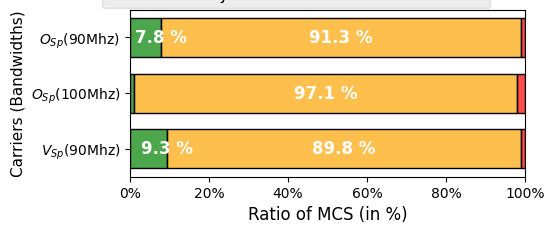

In [11]:
fig = plt.figure(figsize=(5, 2.2))
gs1 = gridspec.GridSpec(1, 1, wspace=0.1, hspace=0.08, top=.99, bottom=0.23, left=0.2, right=0.99, figure=fig)
  
ax0 = plt.subplot(gs1[0])

ax0 = sns.histplot(data=data, y='Operators', hue=x_qam, multiple='fill', discrete=True, shrink=0.7,
             palette=['red', 'orange', 'green'], alpha=0.7,
            linewidth=1)
ax0.set_ylim([-0.5,2.5])
ax0.set_ylabel('Carriers (Bandwidths)', fontsize=11)
ax0.set_xlabel('Ratio of MCS (in %)', fontsize=12)
ax0.set_yticklabels(['$V_{Sp}$(90Mhz)', '$O_{Sp}$(100Mhz)', '$O_{Sp}$(90Mhz)'], fontsize=10)#, rotation=45)

h0, = plt.plot([-100, -100], color='black', lw=0)
h1, = plt.plot([-100, -100], linestyle='-', color='green', lw=3)
h2, = plt.plot([-1000, -1000], linestyle='-', color='orange', lw=3)
h3, = plt.plot([-1000, -1000], linestyle='-', color='yellow', lw=3)
h4, = plt.plot([-1000, -1000], linestyle='-', color='red', lw=3)

legend1 = ax0.legend((h0, h1, h2, h3, h4), ('Num. of Layers','4', '3', '2', '1'),
                     columnspacing=1, loc='upper center', ncol=5, 
                     bbox_to_anchor=(0.42, 1.2), facecolor='#dddddd',
                     handlelength=1.8, framealpha=.3, fontsize = 10, markerscale=40)
ax0.add_artist(legend1)

ax0.xaxis.set_major_formatter(PercentFormatter(1))
for p in ax0.patches:
    h, w, x, y = p.get_height(), p.get_width(), p.get_x(), p.get_y()
    text = f'{w * 100:0.1f} %'
    if w * 100 > 5 and w * 100 < 20:
        ax0.annotate(text=text, xy=(x + w, y + h / 2), ha='center', va='center',
                     color='white', size=12, weight='bold')
    elif w * 100 > 60:
        ax0.annotate(text=text, xy=(x + w /2, y + h / 2), ha='center', va='center',
                     color='white', size=12, weight='bold')

#### Showing plots
plot_name = 'Fig5'
plotme(plt, " Sec4", plot_name, show_flag=SHOW_PLOT_FLAG)
plt.close(fig)
